## Initialisation

### Dependencies

#### Third party

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Personal Notebook

An index file already exists for tensile_test_data.csv. Do you want to re-initalise? (Y/n): Y
An output file already exists for tensile_test_data.csv. Do you want to re-initalise? (Y/n): Y


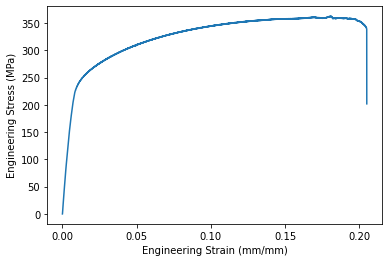

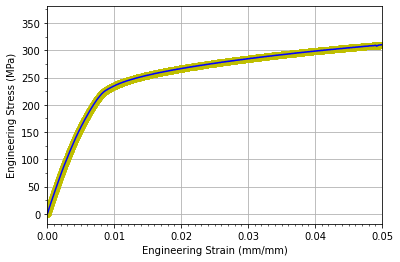

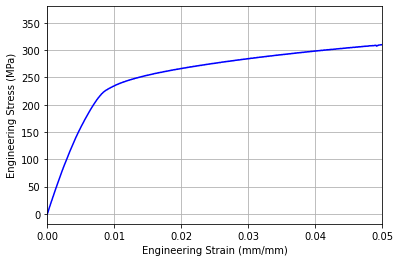

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 0.007
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 210


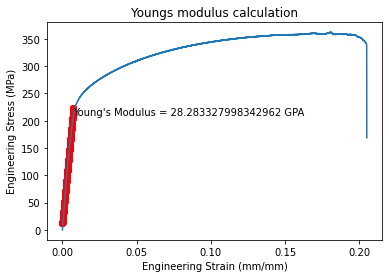

Young's Modulus: 28.283327998342962 GPa
Yield Strength: 236.470693 MPa
Ultimate Tensile Strength is 362.20079200000004 MPa at 18.095% elongation.


<Figure size 432x288 with 0 Axes>

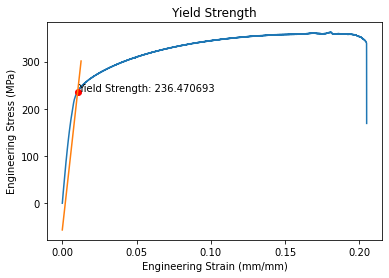

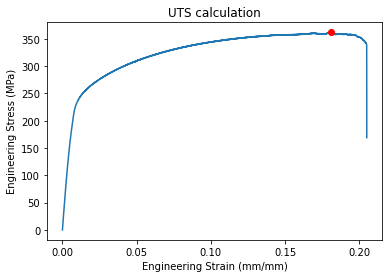

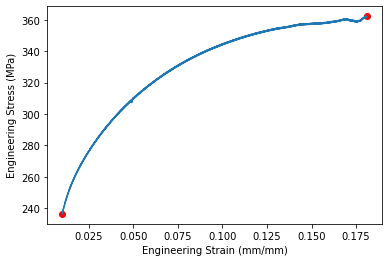

In [2]:
import ipynb

from ipynb.fs.full.dataset_initialisation import (
    ifile,
    ofile,
    OUTPUT_DIR,
)

youngs_modulus = ifile.get_parameter('youngs_modulus')
if youngs_modulus is None:
    from ipynb.fs.full.engineering_strain_stress import (
        youngs_modulus,
    )

yield_strength = ifile.get_parameter('yield_strength')
if yield_strength is None:
    from ipynb.fs.full.engineering_strain_stress import (
        yield_strength,
    )

if (os.path.exists(f'{OUTPUT_DIR}/plastic_region.csv')):
    df = pd.read_csv(f'{OUTPUT_DIR}/plastic_region.csv', sep=',', names=['x','y'])
    x_plastic_region = df['x']
    y_smooth_plastic_region = df['y']
else:
    from ipynb.fs.full.engineering_strain_stress import (
        x_plastic_region,
        y_smooth_plastic_region,
    )   

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Plot of True Strain v/s True Stress

### $\epsilon$ v/s $\sigma$

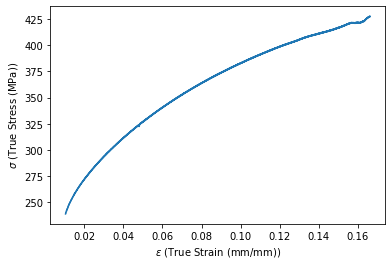

In [4]:
true_strain = np.log([i+1 for i in x_plastic_region])
true_stress = [y_smooth_plastic_region[i]*(1+x_plastic_region[i]) for i in range(len(x_plastic_region))]

fig, ax = plt.subplots(1,1)
_ = ax.plot(true_strain, true_stress)
_ = ax.set_xlabel('$\epsilon$ (True Strain (mm/mm))')
_ = ax.set_ylabel('$\sigma$ (True Stress (MPa))')
plt.savefig(f'{OUTPUT_DIR}/True stress vs strain', facecolor='white', transparent=True)

## Plot of True Plastic Strain v/s True Stress


### Definition of true plastic strain

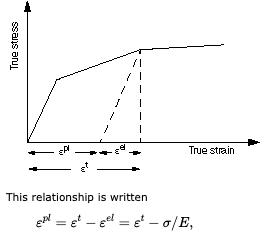

### $\epsilon_{pl}$ v/s $\sigma$


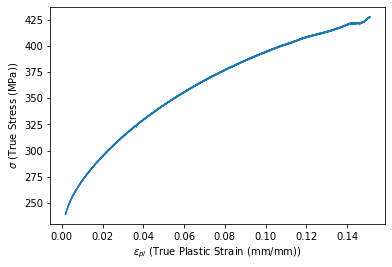

In [5]:
true_plastic_strain = [(true_strain[i] - true_stress[i]/youngs_modulus) for i in range(len(true_strain))]

fig, ax = plt.subplots(1,1)
_ = ax.plot(true_plastic_strain, true_stress)
_ = ax.set_xlabel('$\epsilon_{pl}$ (True Plastic Strain (mm/mm))')
_ = ax.set_ylabel('$\sigma$ (True Stress (MPa))')
plt.savefig(f'{OUTPUT_DIR}/True stress vs plastic strain', facecolor='white', transparent=True)

### Plot of $\epsilon$ v/s flow stress ($\sigma - \sigma_{ys}$)

Do you want to refactor flow stress? (Y/n): n


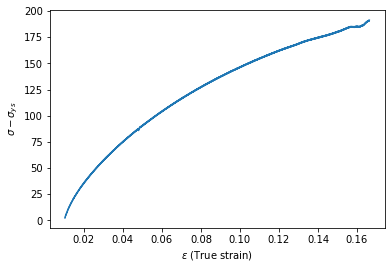

In [17]:
flow_stress = []
choose = input('Do you want to refactor flow stress? (Y/n): ')
if choose in ['Y', 'y']:
    flow_stress = [true_stress[i] - yield_strength*(1+x_plastic_region[i]) for i in range(len(x_plastic_region))]
else:
    flow_stress = [i - float(yield_strength) for i in true_stress]

fig, ax = plt.subplots(1,1)
_ = ax.plot(true_strain, flow_stress)
_ = ax.set_xlabel('$\epsilon$ (True strain)')
_ = ax.set_ylabel('$\sigma - \sigma_{ys}$')
plt.savefig(f'{OUTPUT_DIR}/Flow stress vs True strain', facecolor='white', transparent=True)

If you are getting a high value of $ \sigma - \sigma_{ys}$, it is because of excessive machine elongation during tensile testing. Either the machine is not stiff or there is some slipping between the clamps and the specimen.

In [20]:
# True strain v/s true stress
pd.DataFrame(
    np.transpose(np.asarray([true_strain, true_stress], dtype=object))
).to_csv(f'{OUTPUT_DIR}/true_strain_vs_true_stress.csv', index=False, header=False)

# True plastic strain v/s true stress
pd.DataFrame(
    np.transpose(np.asarray([true_plastic_strain, true_stress], dtype=object))
).to_csv(f'{OUTPUT_DIR}/true_plastic_strain_vs_true_stress.csv', index=False, header=False)

# True strain v/s Flow stress
pd.DataFrame(
    np.transpose(np.asarray([true_strain, flow_stress], dtype=object))
).to_csv(f'{OUTPUT_DIR}/true_strain_vs_flow_stress.csv', index=False, header=False)